## Dependency

In [3]:
%matplotlib inline
from brian2 import *
import numpy as np
import math
from scipy.stats import kstest, norm
import pandas
import seaborn as sns
import statistics as stats
import sys
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def chunk_mean(lst,REP):
    # List to store the means
    means = []
    
    # Iterate over the list in steps of 5
    for i in range(0, len(lst), REP):
        # Get the next chunk of 5 elements
        chunk = lst[i:i+REP]
        
        # Calculate the mean if the chunk is not empty
        if chunk:
            mean = sum(chunk) / len(chunk)
            means.append(mean)
    
    return means

def rescale(x_values, l, h, L, H):
    return [((x - l) * (H - L) / (h - l)) + L for x in x_values]

## Main

### Gaussian weight sampling

In [5]:
n=31
Wstd=7
w_Ew=284.331

w_Ew_randn=[]
for i in np.arange(2*n-2,(n-1)*6):
    w_Ew_randn.append( w_Ew + Wstd*np.random.randn() )

In [6]:
# Defining Presenting Order
start_scope()

n=31
N_Trial=500

acc=range(N_Trial)
victory_count=np.zeros(n-1)
suc=0
for trial in acc:
    test_set=[]
    control=[]
    L=2 #local domain
    U=L+1

    #initial conditions
    light=0       ###10^-8


    n=31 #num of neurons
    jump=2 #spacing

    slope=5               
    t=46*ms   #53.75        
    threshold=540   
    mean=124
    std=350       #done

    w_I=-380      #354      
    w_Eb=20           
    w_Ew=284.331 #284.331   


    #simulation
    eqs='''
    dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
    Iin : 1
    Isyn : 1
    theta : 1
    a : 1
    sigma : 1
    tau : second
    mu : 1
    '''

    G=NeuronGroup(n, eqs, method='euler');


    G.r = 0.0
    G.tau=t
    G.Iin=0
    G.Iin[15]=light
    G.theta=threshold
    G.a=slope
    G.mu=mean
    G.sigma=std


    S = Synapses(G, G, '''
                w : 1 # synaptic weight
                Isyn_post = w * r_pre : 1 (summed)
                ''')

    I=[];J=[]
    for syn in range(1,n):
        I.append(syn)
        J.append(0)
    for syn in range(1,n):
        I.append(0)
        J.append(syn)

    for syn in range(1,n):
        if syn < (n-1):
            I.append(syn)
            J.append(syn+1)
        else:
            I.append(syn)
            J.append(1)
    if n>3:
        for syn in range(n-1,0,-1):
            if syn>1:
                I.append(syn)
                J.append(syn-1)
            else:
                I.append(syn)
                J.append(n-1)
    if n>4:
        for syn in range(1,n):
            if (syn+jump) <= (n-1):
                I.append(syn)
                J.append(syn+jump)
            else:
                I.append(syn)
                J.append(syn-(n-1-jump))
    if n>5:
        for syn in range(n-1,0,-1):
            if syn>jump:
                I.append(syn)
                J.append(syn-2)
            else:
                I.append(syn)
                J.append(syn+(n-1-jump))



    S.connect(i=I,j=J)

    for syn in np.arange(n-1):
        S.w[syn]=w_Eb


    for syn in np.arange(n-1, 2*n-2):
        S.w[syn]=w_I

    i=0
    for syn in np.arange(2*n-2,len(S.w)):
        S.w[syn]=w_Ew_randn[i]
        i+=1

    M = StateMonitor(G, 'r', record=True)

    run(3500*ms)
    MAX=np.argmax(np.mean(M.r[1:31,20000:],axis=1))+1
    if 0.1<np.mean(M.r[1:31,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
        victory_count[MAX-1]+=1
        suc+=1
    print(f'Trial{trial}')
    clear_output(wait=True)

success_rate=round(suc/N_Trial,2)
print(f'Success Rate: {success_rate}');
bar(range(1,n), victory_count);
xlabel('Neuron index');
ylabel('winning count');




my_dict = {index+1: value for index, value in enumerate(victory_count)}

# Sort dictionary by values
sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1], reverse=False))

print(sorted_dict)

indexs=list(sorted_dict.keys())

Success Rate: 1.0
{2: 0.0, 3: 0.0, 5: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 19: 0.0, 20: 0.0, 23: 0.0, 25: 0.0, 28: 0.0, 29: 0.0, 17: 1.0, 22: 1.0, 26: 1.0, 21: 2.0, 30: 2.0, 9: 5.0, 18: 5.0, 16: 6.0, 24: 10.0, 8: 11.0, 7: 21.0, 4: 34.0, 10: 35.0, 27: 44.0, 1: 157.0, 6: 165.0}


### 1. my approach

In [ ]:
start_scope()


num_trial=10

for trial in range(num_trial):
    test_set=[]
    control=[]
    L=2 #local domain
    U=L+1

    #initial conditions
    light=0       ###10^-8


    n=31 #num of neurons
    jump=2 #spacing

    slope=5               
    t=46*ms           
    threshold=540   
    mean=124
    std=350       #done

    w_I=-380      #354    
    w_Eb=20           
    w_Ew=284.331 


    #simulation
    eqs='''
    dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
    Iin : 1
    Isyn : 1
    theta : 1
    a : 1
    sigma : 1
    tau : second
    mu : 1
    '''

    G=NeuronGroup(n, eqs, method='euler');


    G.r = 0.0
    G.tau=t
    G.Iin=0
    G.Iin[15]=light
    G.theta=threshold
    G.a=slope
    G.mu=mean
    G.sigma=std


    S = Synapses(G, G, '''
                w : 1 # synaptic weight
                Isyn_post = w * r_pre : 1 (summed)
                ''')

    I=[];J=[]
    for syn in range(1,n):
        I.append(syn)
        J.append(0)
    for syn in range(1,n):
        I.append(0)
        J.append(syn)

    for syn in range(1,n):
        if syn < (n-1):
            I.append(syn)
            J.append(syn+1)
        else:
            I.append(syn)
            J.append(1)
    if n>3:
        for syn in range(n-1,0,-1):
            if syn>1:
                I.append(syn)
                J.append(syn-1)
            else:
                I.append(syn)
                J.append(n-1)
    if n>4:
        for syn in range(1,n):
            if (syn+jump) <= (n-1):
                I.append(syn)
                J.append(syn+jump)
            else:
                I.append(syn)
                J.append(syn-(n-1-jump))
    if n>5:
        for syn in range(n-1,0,-1):
            if syn>jump:
                I.append(syn)
                J.append(syn-2)
            else:
                I.append(syn)
                J.append(syn+(n-1-jump))



    S.connect(i=I,j=J)


    for syn in np.arange(n-1):
        S.w[syn]=w_Eb


    for syn in np.arange(n-1, 2*n-2):
        S.w[syn]=w_I

    i=0
    for syn in np.arange(2*n-2,len(S.w)):
        S.w[syn]=w_Ew_randn[i]
        i+=1

    M = StateMonitor(G, 'r', record=True)

    run(8000*ms)

    figure()
    neuron_index=range(1,n)
    pc=pcolormesh(M.t,neuron_index,M.r[indexs],cmap='plasma', shading='auto')
    title(f'Trial: {trial+1}')
    xlabel('t(s)')
    ylabel('neuron index')
    yticks(ticks=range(1,31), labels=indexs)
    show();

### 2. Trial-one-based approach

In [ ]:
start_scope()


num_trial=10


test_set=[]
control=[]
L=2 #local domain
U=L+1

#initial conditions
light=0       ###10^-8


n=31 #num of neurons
jump=2 #spacing

slope=5               
t=46*ms           
threshold=540   
mean=124
std=350       #done

w_I=-380      #354    
w_Eb=20           
w_Ew=284.331 


#simulation
eqs='''
dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
sigma : 1
tau : second
mu : 1
'''

G=NeuronGroup(n, eqs, method='euler');


G.r = 0.0
G.tau=t
G.Iin=0
G.Iin[15]=light
G.theta=threshold
G.a=slope
G.mu=mean
G.sigma=std


S = Synapses(G, G, '''
            w : 1 # synaptic weight
            Isyn_post = w * r_pre : 1 (summed)
            ''')

I=[];J=[]
for syn in range(1,n):
    I.append(syn)
    J.append(0)
for syn in range(1,n):
    I.append(0)
    J.append(syn)

for syn in range(1,n):
    if syn < (n-1):
        I.append(syn)
        J.append(syn+1)
    else:
        I.append(syn)
        J.append(1)
if n>3:
    for syn in range(n-1,0,-1):
        if syn>1:
            I.append(syn)
            J.append(syn-1)
        else:
            I.append(syn)
            J.append(n-1)
if n>4:
    for syn in range(1,n):
        if (syn+jump) <= (n-1):
            I.append(syn)
            J.append(syn+jump)
        else:
            I.append(syn)
            J.append(syn-(n-1-jump))
if n>5:
    for syn in range(n-1,0,-1):
        if syn>jump:
            I.append(syn)
            J.append(syn-2)
        else:
            I.append(syn)
            J.append(syn+(n-1-jump))



S.connect(i=I,j=J)


for syn in np.arange(n-1):
    S.w[syn]=w_Eb


for syn in np.arange(n-1, 2*n-2):
    S.w[syn]=w_I

i=0
for syn in np.arange(2*n-2,len(S.w)):
    S.w[syn]=w_Ew_randn[i]
    i+=1

M = StateMonitor(G, 'r', record=True)

run(8000*ms)
activity=[]
for i in range(1, n):
    activity.append(np.mean(M.r[i][20000:]))

activity_dict = {index+1: value for index, value in enumerate(activity)}

# Sort dictionary by values
sorted_activity_dict = dict(sorted(activity_dict.items(), key=lambda item: item[1], reverse=False)) #small->big

print(sorted_activity_dict)
indexs=list(sorted_activity_dict.keys())



figure()
neuron_index=range(1,n)
pc=pcolormesh(M.t,neuron_index,M.r[indexs],cmap='plasma', shading='auto');
xlabel('t(s)')
ylabel('neuron index')
yticks(ticks=range(1,31), labels=indexs)
title('Trial: 1')
show()

# present in the same order according to 1st trial
for trial in range(num_trial-1):
    test_set=[]
    control=[]
    L=2 #local domain
    U=L+1

    #initial conditions
    light=0       ###10^-8


    n=31 #num of neurons
    jump=2 #spacing

    slope=5               
    t=46*ms           
    threshold=540   
    mean=124
    std=350       #done

    w_I=-380      #354    
    w_Eb=20           
    w_Ew=284.331 


    #simulation
    eqs='''
    dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
    Iin : 1
    Isyn : 1
    theta : 1
    a : 1
    sigma : 1
    tau : second
    mu : 1
    '''

    G=NeuronGroup(n, eqs, method='euler');


    G.r = 0.0
    G.tau=t
    G.Iin=0
    G.Iin[15]=light
    G.theta=threshold
    G.a=slope
    G.mu=mean
    G.sigma=std


    S = Synapses(G, G, '''
                w : 1 # synaptic weight
                Isyn_post = w * r_pre : 1 (summed)
                ''')

    I=[];J=[]
    for syn in range(1,n):
        I.append(syn)
        J.append(0)
    for syn in range(1,n):
        I.append(0)
        J.append(syn)

    for syn in range(1,n):
        if syn < (n-1):
            I.append(syn)
            J.append(syn+1)
        else:
            I.append(syn)
            J.append(1)
    if n>3:
        for syn in range(n-1,0,-1):
            if syn>1:
                I.append(syn)
                J.append(syn-1)
            else:
                I.append(syn)
                J.append(n-1)
    if n>4:
        for syn in range(1,n):
            if (syn+jump) <= (n-1):
                I.append(syn)
                J.append(syn+jump)
            else:
                I.append(syn)
                J.append(syn-(n-1-jump))
    if n>5:
        for syn in range(n-1,0,-1):
            if syn>jump:
                I.append(syn)
                J.append(syn-2)
            else:
                I.append(syn)
                J.append(syn+(n-1-jump))



    S.connect(i=I,j=J)


    for syn in np.arange(n-1):
        S.w[syn]=w_Eb


    for syn in np.arange(n-1, 2*n-2):
        S.w[syn]=w_I

    i=0
    for syn in np.arange(2*n-2,len(S.w)):
        S.w[syn]=w_Ew_randn[i]
        i+=1

    M = StateMonitor(G, 'r', record=True)

    run(8000*ms)

    figure()
    neuron_index=range(1,n)
    pc=pcolormesh(M.t,neuron_index,M.r[indexs],cmap='plasma', shading='auto')
    title(f'Trial: {trial+2}')
    xlabel('t(s)')
    ylabel('neuron index')
    yticks(ticks=range(1,31), labels=indexs)
    show();

### Success Rate check

In [7]:
start_scope()

n=31
N_Trial=100

acc=range(N_Trial)
victory_count=np.zeros(n-1)
suc=0
for trial in acc:
    test_set=[]
    control=[]
    L=2 #local domain
    U=L+1

    #initial conditions
    light=0       ###10^-8


    n=31 #num of neurons
    jump=2 #spacing

    slope=5               
    t=46*ms   #53.75        
    threshold=540   
    mean=124
    std=350       #done

    w_I=-380      #354      
    w_Eb=20           
    w_Ew=284.331 #284.331   


    #simulation
    eqs='''
    dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
    Iin : 1
    Isyn : 1
    theta : 1
    a : 1
    sigma : 1
    tau : second
    mu : 1
    '''

    G=NeuronGroup(n, eqs, method='euler');


    G.r = 0.0
    G.tau=t
    G.Iin=0
    G.Iin[15]=light
    G.theta=threshold
    G.a=slope
    G.mu=mean
    G.sigma=std


    S = Synapses(G, G, '''
                w : 1 # synaptic weight
                Isyn_post = w * r_pre : 1 (summed)
                ''')

    I=[];J=[]
    for syn in range(1,n):
        I.append(syn)
        J.append(0)
    for syn in range(1,n):
        I.append(0)
        J.append(syn)

    for syn in range(1,n):
        if syn < (n-1):
            I.append(syn)
            J.append(syn+1)
        else:
            I.append(syn)
            J.append(1)
    if n>3:
        for syn in range(n-1,0,-1):
            if syn>1:
                I.append(syn)
                J.append(syn-1)
            else:
                I.append(syn)
                J.append(n-1)
    if n>4:
        for syn in range(1,n):
            if (syn+jump) <= (n-1):
                I.append(syn)
                J.append(syn+jump)
            else:
                I.append(syn)
                J.append(syn-(n-1-jump))
    if n>5:
        for syn in range(n-1,0,-1):
            if syn>jump:
                I.append(syn)
                J.append(syn-2)
            else:
                I.append(syn)
                J.append(syn+(n-1-jump))



    S.connect(i=I,j=J)

    S.w=w_Ew
    for syn in np.arange(n-1):
        S.w[syn]=w_Eb

    for syn in np.arange(n-1, 2*n-2):
        S.w[syn]=w_I


    M = StateMonitor(G, 'r', record=True)

    run(3000*ms)
    MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
    if 0.1<np.mean(M.r[:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
        victory_count[MAX-1]+=1
        suc+=1
    print(f'Trial{trial}')
    clear_output(wait=True)

success_rate=round(suc/N_Trial,2)
print(f'Success Rate: {success_rate}');
bar(range(1,n), victory_count);
xlabel('Neuron index');
ylabel('winning count');

Success Rate: 1.0


## Parametization Rationale

$
Loss~function:~ f(Y-T)
$

## Parameter Tuning

### inspection

MAX index: 10
Max: 0.8224373798013508
peak height: 0.5993675755170276


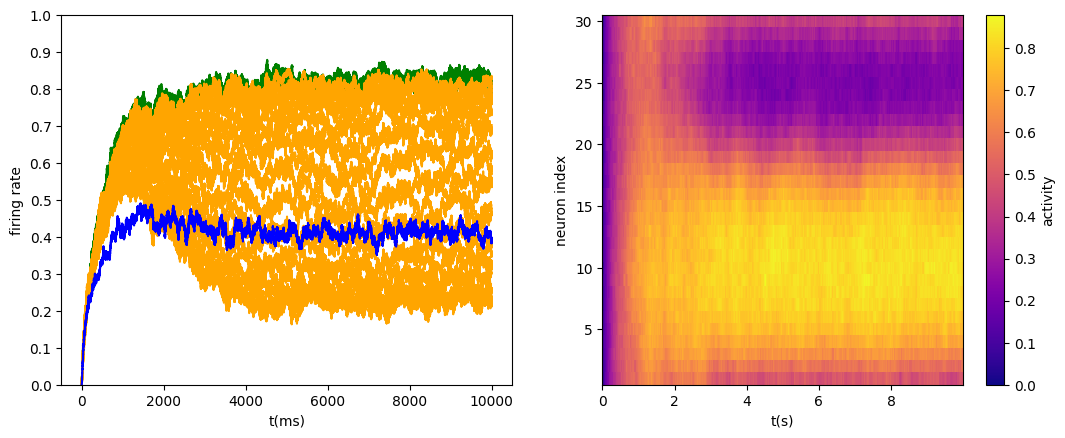

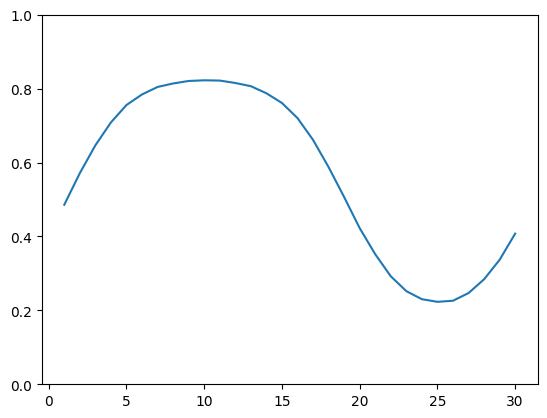

In [7]:
start_scope()


test_set=[]
control=[]
L=2 #local domain
U=L+1
width=None


#initial conditions
light=0       


n=31 #num of neurons
jump=2 #spacing

slope=5               
t=46*ms           
threshold=540
mean=110 ##
std=400   ##      

w_I=-380      
w_Eb=20           
w_Ew=292.5 ##


#simulation
eqs='''
dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
sigma : 1
tau : second
mu : 1
'''

G=NeuronGroup(n, eqs, method='euler');


G.r = 0.0
G.tau=t
G.Iin=0
G.Iin[15]=light
G.theta=threshold
G.a=slope
G.mu=mean
G.sigma=std


S = Synapses(G, G, '''
             w : 1 # synaptic weight
             Isyn_post = w * r_pre : 1 (summed)
             ''')

I=[];J=[]
for syn in range(1,n):
    I.append(syn)
    J.append(0)
for syn in range(1,n):
    I.append(0)
    J.append(syn)

for syn in range(1,n):
    if syn < (n-1):
        I.append(syn)
        J.append(syn+1)
    else:
        I.append(syn)
        J.append(1)
if n>3:
    for syn in range(n-1,0,-1):
        if syn>1:
            I.append(syn)
            J.append(syn-1)
        else:
            I.append(syn)
            J.append(n-1)
if n>4:
    for syn in range(1,n):
        if (syn+jump) <= (n-1):
            I.append(syn)
            J.append(syn+jump)
        else:
            I.append(syn)
            J.append(syn-(n-1-jump))
if n>5:
    for syn in range(n-1,0,-1):
        if syn>jump:
            I.append(syn)
            J.append(syn-2)
        else:
            I.append(syn)
            J.append(syn+(n-1-jump))



S.connect(i=I,j=J)

S.w=w_Ew
for syn in np.arange(n-1):
    S.w[syn]=w_Eb

for syn in np.arange(n-1, 2*n-2):
    S.w[syn]=w_I


M = StateMonitor(G, 'r', record=True)

run(10000*ms)

figure(figsize=(12.8,4.8))
subplot(121)

MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
for i in range(1,31):
    if (MAX-i)<=0:
        if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<(1/(np.e)**2):
            width=(i*2)
            break
    else:
        if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<(1/(np.e)**2):
            width=(i*2)
            break 

#Winners
winner_id=[]
if MAX<=L:
    for i in range(MAX-L,MAX+U):
        if i <=0:
            plot(M.t/ms, M.r[i+(n-1)], color='green')
            winner_id.append(i+(n-1))
            
        else:
            plot(M.t/ms, M.r[i%(n-1)], color='green')
            winner_id.append(i%(n-1))
            
else:
    for i in range(MAX-L,MAX+U):
        if i == 31:
            plot(M.t/ms, M.r[1], color='green')
            winner_id.append(1)
            
        else:
            plot(M.t/ms, M.r[i%n], color='green')
            winner_id.append(i%n)
            


#Non-winners
for i in range(1,n):
    if i not in winner_id:
        plot(M.t/ms, M.r[i], color='orange')
        control.append(np.mean(M.r[i]))


plot(M.t/ms, M.r[0], color='blue')
ylim(0,1)
yticks(np.arange(0,1.1,0.1))
xlabel('t(ms)')
ylabel('firing rate')

subplot(122)
neuron_index=range(1,n)
pc=pcolormesh(M.t,neuron_index,M.r[1:31],cmap='plasma', shading='auto');
cbar = colorbar(pc)  # 'pc' is the return value of the pcolormesh call
cbar.set_label('activity')
xlabel('t(s)')
ylabel('neuron index')


print(f'MAX index: {MAX}')
print(f'Max: {np.mean(M.r[MAX,30000:])}')
print(f'peak height: {np.mean(M.r[MAX,30000:])-np.mean(M.r[MIN,30000:])}')

if width:
    print(f'Width: {width}')

#Distribution check
figure(figsize=(6.4,4.8))
plot(range(1,31),np.mean(M.r[1:,30000:], axis=1))
ylim(0,1);

Completed 3690/3690: Iter_MN 17, Iter_WEW 40>>Rep 5


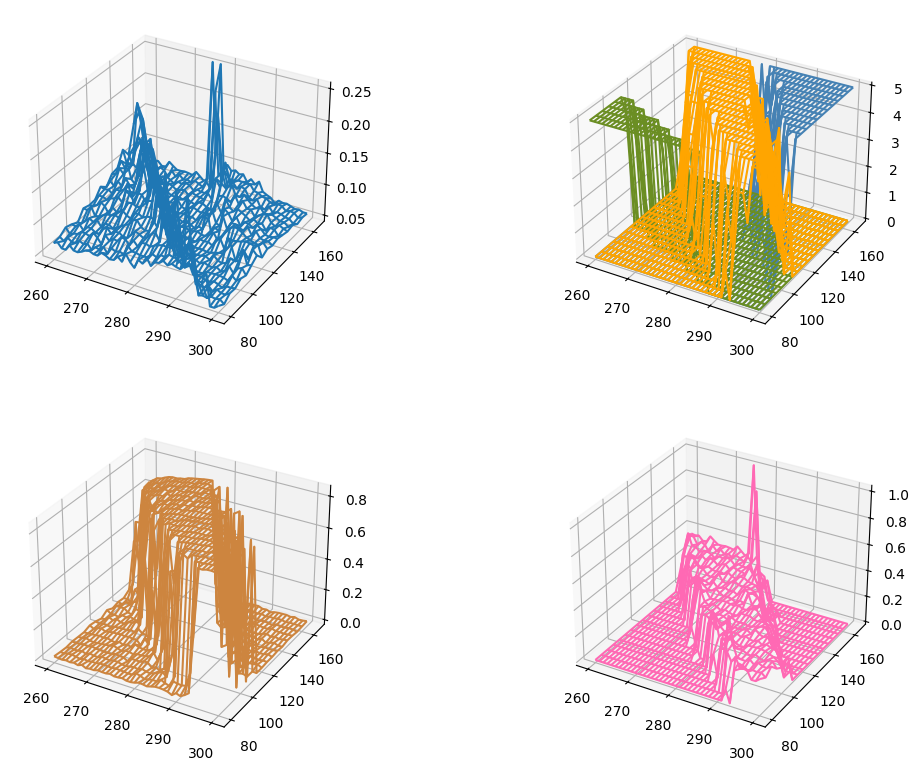

Optimal config
Mean: 165, w_Ew: 276


In [10]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1


LB2=80; UB2=170; STEP2=5
acc2=np.arange(LB2,UB2, STEP2)

LB=260; UB=301; STEP=1
acc=np.arange(LB, UB, STEP)

REP=5

explosion=np.zeros((len(acc2),len(acc)))
success=np.zeros((len(acc2),len(acc)))
trivial=np.zeros((len(acc2),len(acc)))
global_var=np.zeros((len(acc2),len(acc)))
peak_heights=np.zeros((len(acc2),len(acc)))

width=None

total_jobs = len(acc2) * len(acc) * REP
completed_jobs = 0
Iter_MN=0
for MN in acc2:
    Iter_WEW=0
    for WEW in acc:
        ex=0
        suc=0
        tri=0
        repetition=0
        ind_var=[]
        for rep in range(REP):
            test_set=[]
            control=[]  
            #initial conditions
            light=0       ###10^-8


            n=31 #num of neurons
            jump=2 #spacing

            slope=5               
            t=46*ms           
            threshold=540   
            mean=MN
            std=350       #done

            w_I=-380      #354    
            w_Eb=20           
            w_Ew=WEW      #284  


            #simulation
            eqs='''
            dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
            Iin : 1
            Isyn : 1
            theta : 1
            a : 1
            sigma : 1
            tau : second
            mu : 1
            '''

            G=NeuronGroup(n, eqs, method='euler');


            G.r = 0.0
            G.tau=t
            G.Iin=0
            G.theta=threshold
            G.a=slope
            G.mu=mean
            G.sigma=std


            S = Synapses(G, G, '''
                        w : 1 # synaptic weight
                        Isyn_post = w * r_pre : 1 (summed)
                        ''')

            I=[];J=[]
            for syn in range(1,n):
                I.append(syn)
                J.append(0)
            for syn in range(1,n):
                I.append(0)
                J.append(syn)

            for syn in range(1,n):
                if syn < (n-1):
                    I.append(syn)
                    J.append(syn+1)
                else:
                    I.append(syn)
                    J.append(1)
            if n>3:
                for syn in range(n-1,0,-1):
                    if syn>1:
                        I.append(syn)
                        J.append(syn-1)
                    else:
                        I.append(syn)
                        J.append(n-1)
            if n>4:
                for syn in range(1,n):
                    if (syn+jump) <= (n-1):
                        I.append(syn)
                        J.append(syn+jump)
                    else:
                        I.append(syn)
                        J.append(syn-(n-1-jump))
            if n>5:
                for syn in range(n-1,0,-1):
                    if syn>jump:
                        I.append(syn)
                        J.append(syn-2)
                    else:
                        I.append(syn)
                        J.append(syn+(n-1-jump))



            S.connect(i=I,j=J)

            S.w=w_Ew
            for syn in np.arange(n-1):
                S.w[syn]=w_Eb

            for syn in np.arange(n-1, 2*n-2):
                S.w[syn]=w_I



            M = StateMonitor(G, 'r', record=True)

            run(6000*ms)

            MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][30000:])/np.mean(M.r[MAX][30000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][30000:])/np.mean(M.r[MAX][30000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break 
            
            
            if width:
                L=int(floor(width/2)-2) #local domain
                U=L+1
            else:
                L=3
                U=L+1
            
            if np.mean(M.r)>0.6:
                ex+=1
            elif np.mean(M.r)<=0.2:
                tri+=1
            elif 0.1<np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                suc+=1

            #Winners
            winner_id=[]
            loser_id=[]

            if MAX<=L:
                for i in range(MAX-L,MAX+U):
                    if i <=0:
                        #plot(M.t/ms, M.r[i+(n-1)], color='green')
                        winner_id.append(i+(n-1))
                    else:
                        #plot(M.t/ms, M.r[i%(n-1)], color='green')
                        winner_id.append(i%(n-1))

            else:
                for i in range(MAX-L,MAX+U):
                    if i == 31:
                        #plot(M.t/ms, M.r[1], color='green')
                        winner_id.append(1)
                    else:
                        #plot(M.t/ms, M.r[i%n], color='green')
                        winner_id.append(i%n)


            #Non-winners
            for i in range(1,n):
                if i not in winner_id:
                    #plot(M.t/ms, M.r[i], color='orange')
                    loser_id.append(i)

            #neuron-wise sum of variance
            MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
            ind_var.append(np.std(M.r[MIN][30000:]))
            if repetition==(REP-1):
                global_var[Iter_MN,Iter_WEW]=sum(ind_var)
            peak_heights[Iter_MN,Iter_WEW]=np.mean(M.r[MAX,30000:])-np.mean(M.r[MIN,30000:])
            
            repetition+=1
            completed_jobs+=1
            clear_output(wait=True)
            print(f'Completed {completed_jobs}/{total_jobs}: Iter_MN {Iter_MN}, Iter_WEW {Iter_WEW}>>Rep {repetition}')
           
        explosion[Iter_MN,Iter_WEW]=ex
        success[Iter_MN,Iter_WEW]=suc
        trivial[Iter_MN,Iter_WEW]=tri
        Iter_WEW+=1
    Iter_MN+=1

X, Y = np.meshgrid(acc, acc2)
fig, axs = subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12.8, 9.6))
axs[0,0].plot_wireframe(X, Y, global_var, label='var')

# Plot the wireframe
axs[0,1].plot_wireframe(X, Y, explosion, label='exp', color='steelblue')
axs[0,1].plot_wireframe(X, Y, success, label='suc', color='orange')
axs[0,1].plot_wireframe(X, Y, trivial, label='tri', color='olivedrab')

axs[1,0].plot_wireframe(X, Y, peak_heights, label='ph', color='peru')

axs[1,1].plot_wireframe(X, Y, global_var*success, label='tf', color='hotpink')

show()


ACC2, ACC =(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print(f'Optimal config\nMean: {LB2+ACC2*STEP2}, w_Ew: {LB+ACC*STEP}');

Completed 3690/3690: Iter_MN 17, Iter_WEW 40>>Rep 5


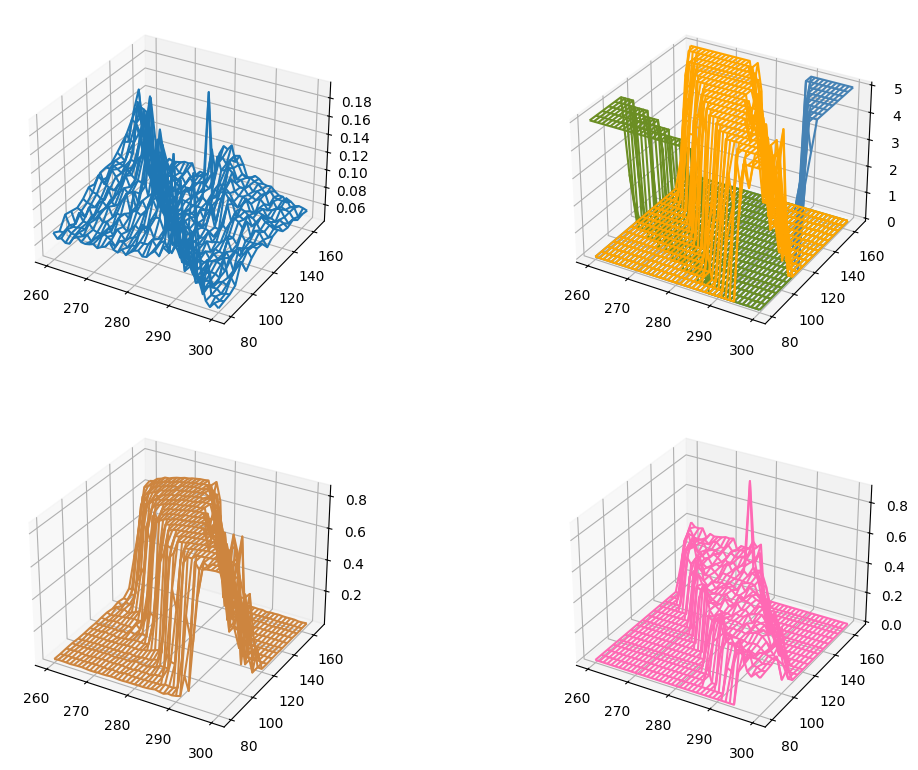

Optimal config
Mean: 150, w_Ew: 279


AttributeError: module 'numpy' has no attribute 'corrcoeff'

In [25]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1


LB2=80; UB2=170; STEP2=5
acc2=np.arange(LB2,UB2, STEP2)

LB=260; UB=301; STEP=1
acc=np.arange(LB, UB, STEP)

REP=5

explosion=np.zeros((len(acc2),len(acc)))
success=np.zeros((len(acc2),len(acc)))
trivial=np.zeros((len(acc2),len(acc)))
global_var=np.zeros((len(acc2),len(acc)))
peak_height_avg=np.zeros((len(acc2),len(acc)))

width=None

total_jobs = len(acc2) * len(acc) * REP
completed_jobs = 0
Iter_MN=0
for MN in acc2:
    Iter_WEW=0
    for WEW in acc:
        ex=0
        suc=0
        tri=0
        repetition=0
        ind_var=[]
        peak_heights=[]
        for rep in range(REP):
            test_set=[]
            control=[]  
            #initial conditions
            light=0       ###10^-8


            n=31 #num of neurons
            jump=2 #spacing

            slope=5               
            t=46*ms           
            threshold=540   
            mean=MN
            std=350       #done

            w_I=-380      #354    
            w_Eb=20           
            w_Ew=WEW      #284  


            #simulation
            eqs='''
            dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
            Iin : 1
            Isyn : 1
            theta : 1
            a : 1
            sigma : 1
            tau : second
            mu : 1
            '''

            G=NeuronGroup(n, eqs, method='euler');


            G.r = 0.0
            G.tau=t
            G.Iin=0
            G.theta=threshold
            G.a=slope
            G.mu=mean
            G.sigma=std


            S = Synapses(G, G, '''
                        w : 1 # synaptic weight
                        Isyn_post = w * r_pre : 1 (summed)
                        ''')

            I=[];J=[]
            for syn in range(1,n):
                I.append(syn)
                J.append(0)
            for syn in range(1,n):
                I.append(0)
                J.append(syn)

            for syn in range(1,n):
                if syn < (n-1):
                    I.append(syn)
                    J.append(syn+1)
                else:
                    I.append(syn)
                    J.append(1)
            if n>3:
                for syn in range(n-1,0,-1):
                    if syn>1:
                        I.append(syn)
                        J.append(syn-1)
                    else:
                        I.append(syn)
                        J.append(n-1)
            if n>4:
                for syn in range(1,n):
                    if (syn+jump) <= (n-1):
                        I.append(syn)
                        J.append(syn+jump)
                    else:
                        I.append(syn)
                        J.append(syn-(n-1-jump))
            if n>5:
                for syn in range(n-1,0,-1):
                    if syn>jump:
                        I.append(syn)
                        J.append(syn-2)
                    else:
                        I.append(syn)
                        J.append(syn+(n-1-jump))



            S.connect(i=I,j=J)

            S.w=w_Ew
            for syn in np.arange(n-1):
                S.w[syn]=w_Eb

            for syn in np.arange(n-1, 2*n-2):
                S.w[syn]=w_I



            M = StateMonitor(G, 'r', record=True)

            run(6000*ms)

            MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][30000:])/np.mean(M.r[MAX][30000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][30000:])/np.mean(M.r[MAX][30000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break 
            
            
            if width:
                L=int(floor(width/2)-2) #local domain
                U=L+1
            else:
                L=3
                U=L+1
            
            if np.mean(M.r)>0.8:
                ex+=1
            elif np.mean(M.r)<=0.2:
                tri+=1
            elif np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                suc+=1

            #Winners
            winner_id=[]
            loser_id=[]

            if MAX<=L:
                for i in range(MAX-L,MAX+U):
                    if i <=0:
                        #plot(M.t/ms, M.r[i+(n-1)], color='green')
                        winner_id.append(i+(n-1))
                    else:
                        #plot(M.t/ms, M.r[i%(n-1)], color='green')
                        winner_id.append(i%(n-1))

            else:
                for i in range(MAX-L,MAX+U):
                    if i == 31:
                        #plot(M.t/ms, M.r[1], color='green')
                        winner_id.append(1)
                    else:
                        #plot(M.t/ms, M.r[i%n], color='green')
                        winner_id.append(i%n)


            #Non-winners
            for i in range(1,n):
                if i not in winner_id:
                    #plot(M.t/ms, M.r[i], color='orange')
                    loser_id.append(i)

            #neuron-wise sum of variance
            MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
            ind_var.append(np.std(M.r[MIN][30000:]))
            peak_heights.append(np.mean(M.r[MAX,30000:])-np.mean(M.r[MIN,30000:]))
            if repetition==(REP-1):
                global_var[Iter_MN,Iter_WEW]=sum(ind_var)
                peak_height_avg[Iter_MN,Iter_WEW]=np.mean(peak_heights)
            
            repetition+=1
            completed_jobs+=1
            clear_output(wait=True)
            print(f'Completed {completed_jobs}/{total_jobs}: Iter_MN {Iter_MN}, Iter_WEW {Iter_WEW}>>Rep {repetition}')
           
        explosion[Iter_MN,Iter_WEW]=ex
        success[Iter_MN,Iter_WEW]=suc
        trivial[Iter_MN,Iter_WEW]=tri
        Iter_WEW+=1
    Iter_MN+=1

X, Y = np.meshgrid(acc, acc2)
fig, axs = subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12.8, 9.6))
axs[0,0].plot_wireframe(X, Y, global_var, label='var')

# Plot the wireframe
axs[0,1].plot_wireframe(X, Y, explosion, label='exp', color='steelblue')
axs[0,1].plot_wireframe(X, Y, success, label='suc', color='orange')
axs[0,1].plot_wireframe(X, Y, trivial, label='tri', color='olivedrab')

axs[1,0].plot_wireframe(X, Y, peak_height_avg, label='ph', color='peru')

axs[1,1].plot_wireframe(X, Y, global_var*success, label='tf', color='hotpink')

show()


ACC2, ACC =(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print(f'Optimal config\nMean: {LB2+ACC2*STEP2}, w_Ew: {LB+ACC*STEP}')
flat1 = success.flatten()
flat2 = peak_height_avg.flatten()
print(np.corrcoef(flat1, flat2));

In [28]:
np.corrcoef(flat1, flat2)

array([[1.        , 0.97395665],
       [0.97395665, 1.        ]])

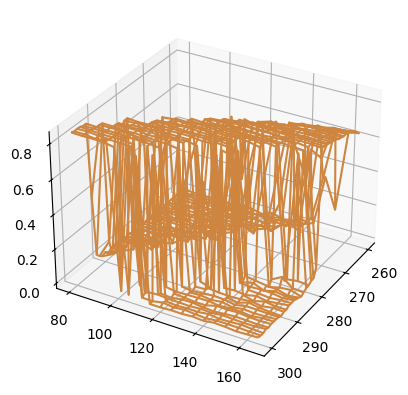

Rotation stopped.


In [16]:
try:
    while True:
        for POV in range(-60, 300, 30):
            fig, axs = subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(6.4, 4.8))
            axs.plot_wireframe(X, Y, peak_heights, label='ph', color='peru')
            axs.view_init(elev=30, azim=POV)
            show()
            time.sleep(0.5)
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Rotation stopped.")

IndexError: index 18 is out of bounds for axis 0 with size 18

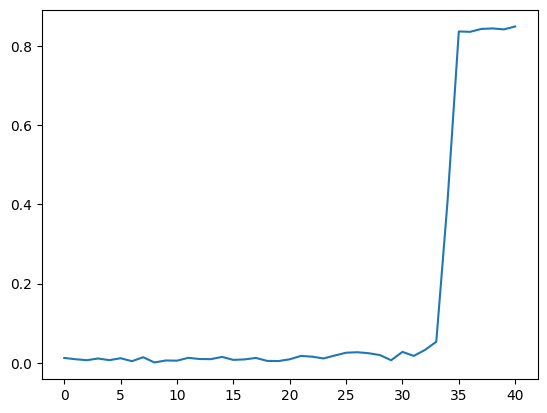

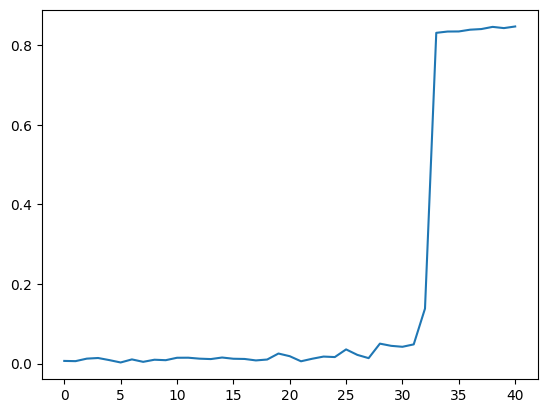

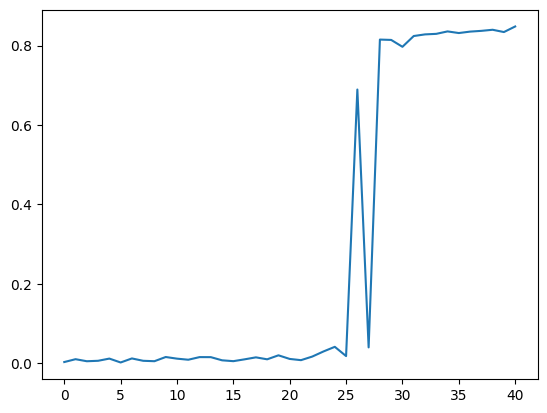

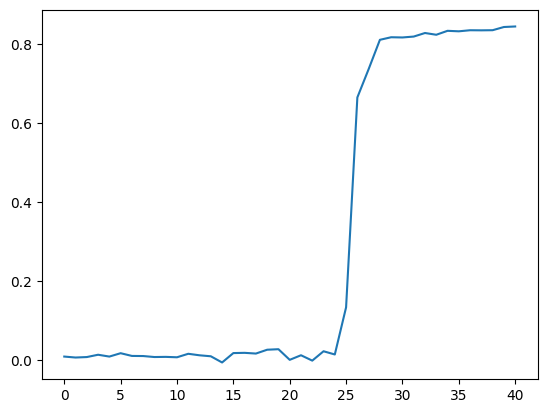

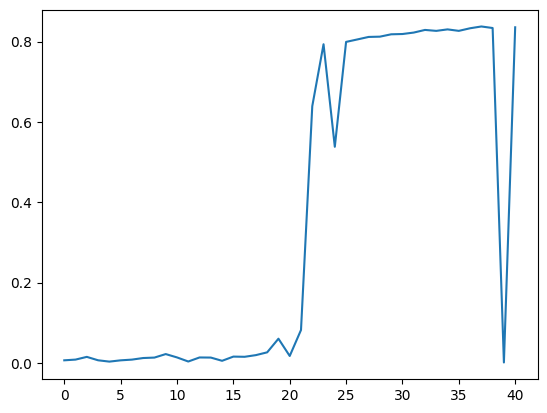

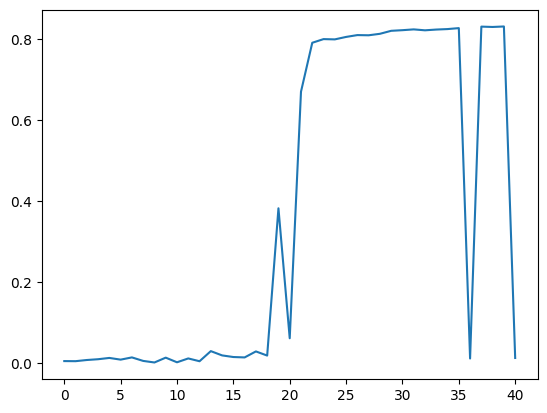

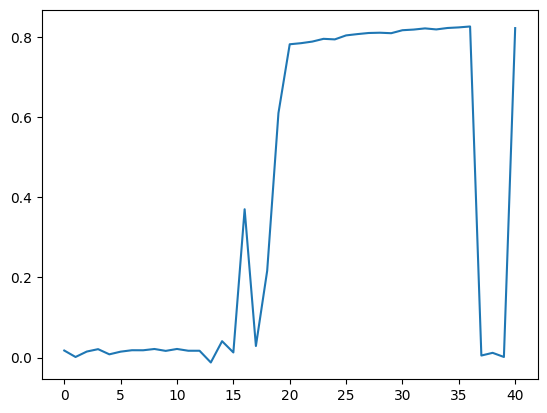

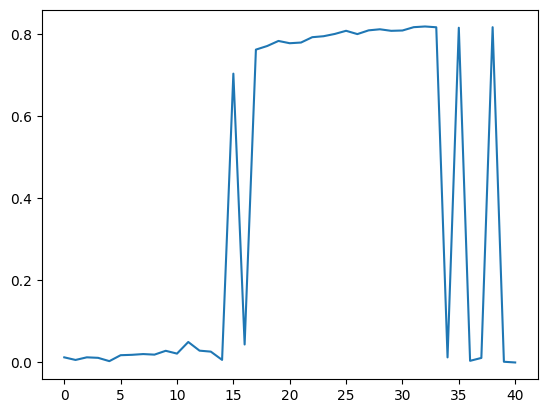

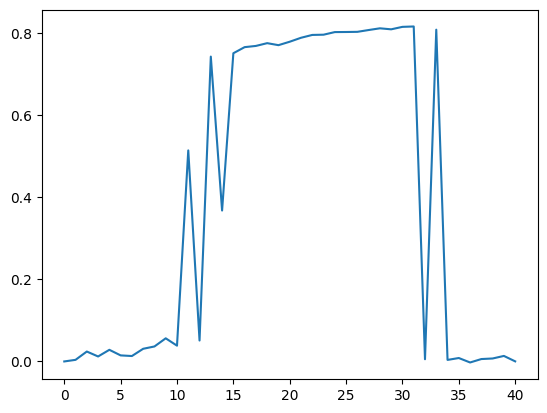

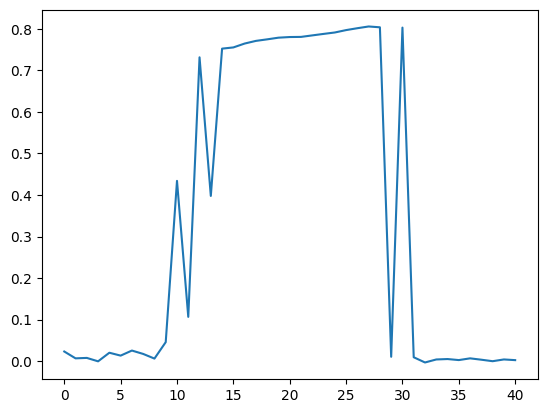

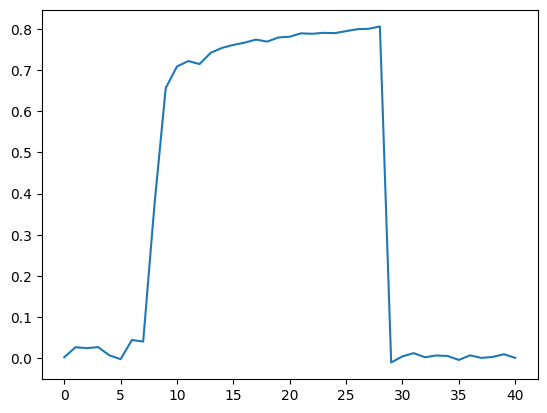

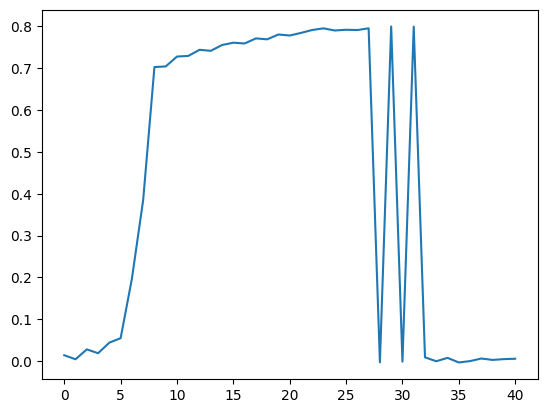

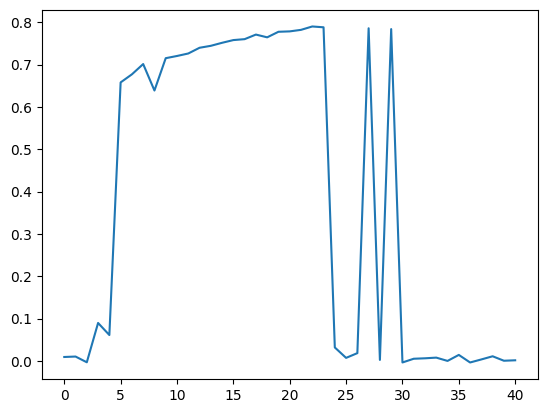

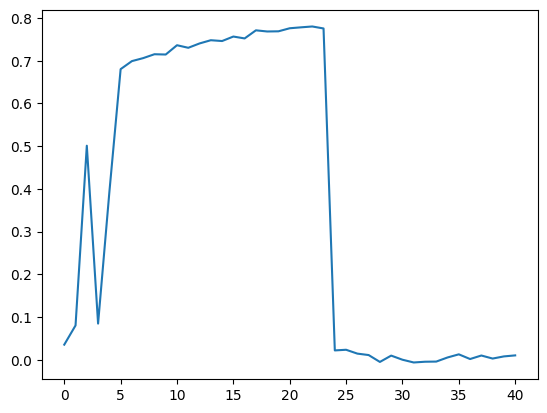

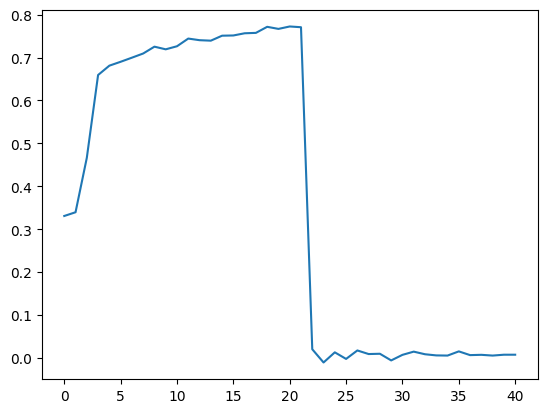

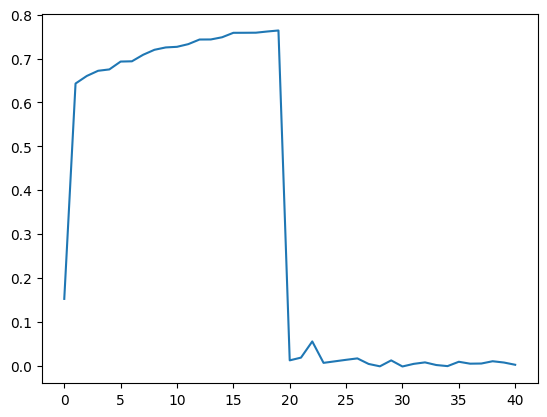

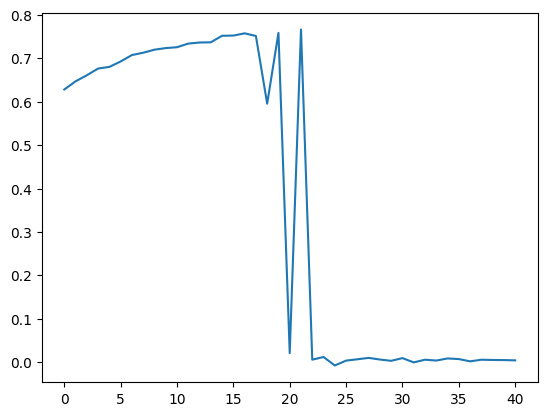

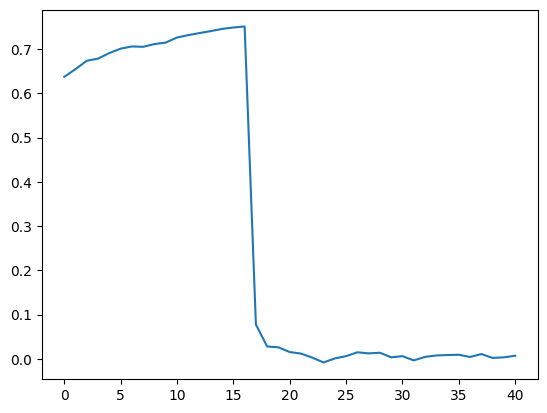

<Figure size 640x480 with 0 Axes>

In [24]:
for i in range(20):
    figure()
    plot(range(len(acc)), peak_heights[i])


以下分別針對各個參數進行調整，再畫出 target function 隨參數的變化，以及模擬結果的比例統計 (trivial, success, explosion)。

<span style="font-size: 11.5px;">
trivial: 神經元 FR 躺平 <br>
success: 成功出現 WTA dynamic<br>
explosion: 神經元 FR 衝到頂
</span>

### 1. Noise mean looping

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(90, 132, 4)

for AVGG in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=46*ms           
        threshold=540   
        mean=AVGG
        std=350       #done

        w_I=-380      #354    
        w_Eb=20           
        w_Ew=284.331         #284 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.1:
            tri+=1
        elif 0.1<np.mean(M.r)<0.5 and np.mean(M.r[MAX])>0.6: 
            suc+=1

        
        #Winners
        winner_id=[]
        if MAX<=L:
            for i in range(MAX-L,MAX+U):
                if i <=0:
                    #plot(M.t/ms, M.r[i+(n-1)], color='green')
                    winner_id.append(i+(n-1))
                    test_set.append(np.mean( M.r[i+(n-1)]))
                else:
                    #plot(M.t/ms, M.r[i%(n-1)], color='green')
                    winner_id.append(i%(n-1))
                    test_set.append(np.mean( M.r[i%(n-1)]))

        else:
            for i in range(MAX-L,MAX+U):
                if i == 31:
                    #plot(M.t/ms, M.r[1], color='green')
                    winner_id.append(1)
                    test_set.append(np.mean( M.r[i%n]))
                else:
                    #plot(M.t/ms, M.r[i%n], color='green')
                    winner_id.append(i%n)
                    test_set.append(np.mean( M.r[i%n]))


        #Non-winners
        for i in range(1,n):
            if i not in winner_id:
                #plot(M.t/ms, M.r[i], color='orange')
                control.append(np.mean( M.r[i]))
                

                
        W_avg=np.mean(test_set)
        L_avg=np.mean(control)

        if MAX==1:
            if np.mean(M.r[n-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[n-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))
        elif MAX==(n-1):
            if np.mean(M.r[MAX-1])>np.mean(M.r[1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[1]))
        else:
            if np.mean(M.r[MAX-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
        
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1



targetf=chunk_mean(reptargetf,REP)
figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc,targetf);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('noise mean')
ylabel('count')

legend(['explosion','success','trivial']);

show();



### 2. W_I tuning

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(320, 391, 1)

for WI in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=394       #done

        w_I=-WI      #      
        w_Eb=20           
        w_Ew=284          #284 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.1:
            tri+=1
        elif 0.1<np.mean(M.r)<0.5 and np.mean(M.r[MAX])>0.6: 
            suc+=1

        
        #Winners
        winner_id=[]
        if MAX<=L:
            for i in range(MAX-L,MAX+U):
                if i <=0:
                    #plot(M.t/ms, M.r[i+(n-1)], color='green')
                    winner_id.append(i+(n-1))
                    test_set.append(np.mean( M.r[i+(n-1)]))
                else:
                    #plot(M.t/ms, M.r[i%(n-1)], color='green')
                    winner_id.append(i%(n-1))
                    test_set.append(np.mean( M.r[i%(n-1)]))

        else:
            for i in range(MAX-L,MAX+U):
                if i == 31:
                    #plot(M.t/ms, M.r[1], color='green')
                    winner_id.append(1)
                    test_set.append(np.mean( M.r[i%n]))
                else:
                    #plot(M.t/ms, M.r[i%n], color='green')
                    winner_id.append(i%n)
                    test_set.append(np.mean( M.r[i%n]))


        #Non-winners
        for i in range(1,n):
            if i not in winner_id:
                #plot(M.t/ms, M.r[i], color='orange')
                control.append(np.mean( M.r[i]))
                

                
        W_avg=np.mean(test_set)
        L_avg=np.mean(control)

        if MAX==1:
            if np.mean(M.r[n-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[n-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))
        elif MAX==(n-1):
            if np.mean(M.r[MAX-1])>np.mean(M.r[1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[1]))
        else:
            if np.mean(M.r[MAX-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
        
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1



targetf=chunk_mean(reptargetf,REP)
figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc,targetf);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();



$\rightarrow$ Best W_I: -354

### 3. trying GRID SEARCH

#### w_Ew * mean gridsearch

In [ ]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1


LB2=80; UB2=170; STEP2=5
acc2=np.arange(LB2,UB2, STEP2)

LB=260; UB=301; STEP=1
acc=np.arange(LB, UB, STEP)

explosion=np.zeros((len(acc2),len(acc)))
success=np.zeros((len(acc2),len(acc)))
trivial=np.zeros((len(acc2),len(acc)))
global_var=np.zeros((len(acc2),len(acc)))
width=None
REP=10

total_jobs = len(acc2) * len(acc)
completed_jobs = 0

Iter_MN=0
for MN in acc2:
    Iter_WEW=0
    for WEW in acc:
        ex=0
        suc=0
        tri=0
        repetition=0
        ind_var=[]
        for rep in range(REP):
            test_set=[]
            control=[]  
            #initial conditions
            light=0       ###10^-8


            n=31 #num of neurons
            jump=2 #spacing

            slope=5               
            t=46*ms           
            threshold=540   
            mean=MN
            std=350       #done

            w_I=-380      #354    
            w_Eb=20           
            w_Ew=WEW      #284  


            #simulation
            eqs='''
            dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
            Iin : 1
            Isyn : 1
            theta : 1
            a : 1
            sigma : 1
            tau : second
            mu : 1
            '''

            G=NeuronGroup(n, eqs, method='euler');


            G.r = 0.0
            G.tau=t
            G.Iin=0
            G.theta=threshold
            G.a=slope
            G.mu=mean
            G.sigma=std


            S = Synapses(G, G, '''
                        w : 1 # synaptic weight
                        Isyn_post = w * r_pre : 1 (summed)
                        ''')

            I=[];J=[]
            for syn in range(1,n):
                I.append(syn)
                J.append(0)
            for syn in range(1,n):
                I.append(0)
                J.append(syn)

            for syn in range(1,n):
                if syn < (n-1):
                    I.append(syn)
                    J.append(syn+1)
                else:
                    I.append(syn)
                    J.append(1)
            if n>3:
                for syn in range(n-1,0,-1):
                    if syn>1:
                        I.append(syn)
                        J.append(syn-1)
                    else:
                        I.append(syn)
                        J.append(n-1)
            if n>4:
                for syn in range(1,n):
                    if (syn+jump) <= (n-1):
                        I.append(syn)
                        J.append(syn+jump)
                    else:
                        I.append(syn)
                        J.append(syn-(n-1-jump))
            if n>5:
                for syn in range(n-1,0,-1):
                    if syn>jump:
                        I.append(syn)
                        J.append(syn-2)
                    else:
                        I.append(syn)
                        J.append(syn+(n-1-jump))



            S.connect(i=I,j=J)

            S.w=w_Ew
            for syn in np.arange(n-1):
                S.w[syn]=w_Eb

            for syn in np.arange(n-1, 2*n-2):
                S.w[syn]=w_I



            M = StateMonitor(G, 'r', record=True)

            run(3000*ms)

            MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<(1 / ((np.e) ** 2)):
                        width=(i*2)
                        break 
            
            
            if width:
                L=int(floor(width/2)-2) #local domain
                U=L+1
            else:
                L=3
                U=L+1
            

            if np.mean(M.r[MAX])




            if np.mean(M.r)>0.6:
                ex+=1
            elif np.mean(M.r)<=0.2:
                tri+=1
            elif 0.1<np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                suc+=1

            #Winners
            winner_id=[]
            loser_id=[]

            if MAX<=L:
                for i in range(MAX-L,MAX+U):
                    if i <=0:
                        #plot(M.t/ms, M.r[i+(n-1)], color='green')
                        winner_id.append(i+(n-1))
                    else:
                        #plot(M.t/ms, M.r[i%(n-1)], color='green')
                        winner_id.append(i%(n-1))

            else:
                for i in range(MAX-L,MAX+U):
                    if i == 31:
                        #plot(M.t/ms, M.r[1], color='green')
                        winner_id.append(1)
                    else:
                        #plot(M.t/ms, M.r[i%n], color='green')
                        winner_id.append(i%n)


            #Non-winners
            for i in range(1,n):
                if i not in winner_id:
                    #plot(M.t/ms, M.r[i], color='orange')
                    loser_id.append(i)

            #neuron-wise sum of variance
            MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
            ind_var.append(np.std(M.r[MIN][22000:]))
            if repetition==(REP-1):
                global_var[Iter_MN,Iter_WEW]=sum(ind_var)

            repetition+=1
            
            clear_output(wait=True)
            print(f'Iter_MN {Iter_MN}, Iter_WEW {Iter_WEW}>>Rep {repetition}')
           
        explosion[Iter_MN,Iter_WEW]=ex
        success[Iter_MN,Iter_WEW]=suc
        trivial[Iter_MN,Iter_WEW]=tri
        Iter_WEW+=1
    Iter_MN+=1

X, Y = np.meshgrid(acc, acc2)
fig, axs = subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12.8, 9.6))
axs[0,0].plot_wireframe(X, Y, global_var, label='var')

# Plot the wireframe
axs[0,1].plot_wireframe(X, Y, explosion, label='exp', color='steelblue')
axs[0,1].plot_wireframe(X, Y, success, label='suc', color='orange')
axs[0,1].plot_wireframe(X, Y, trivial, label='tri', color='olivedrab')

axs[1,0].plot_wireframe(X, Y, global_var*success, label='tf', color='hotpink')

show()


ACC2, ACC =(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print(f'Optimal config\nMean: {LB2+ACC2*STEP2}, w_Ew: {LB+ACC*STEP}');

#### w_Ew * std gridsearch

In [3]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1

#Rep test
explosion=np.zeros((16, 41))
success=np.zeros((16, 41))
trivial=np.zeros((16, 41))
width=None
REP=5

LB2=300; UB2=460; STEP2=10
acc2=np.arange(300, 460, 10)
LB=260; UB=301; STEP=1
acc=np.arange(260, 301, 1)
global_var=np.zeros((16, 41))

Iter_STD=0
for STD in acc2:
    Iter_WEW=0
    for WEW in acc:
        ex=0
        suc=0
        tri=0
        repetition=0
        ind_var=[]
        for rep in range(REP):
            test_set=[]
            control=[]  
            #initial conditions
            light=0       ###10^-8


            n=31 #num of neurons
            jump=2 #spacing

            slope=5               
            t=46*ms           
            threshold=540   
            mean=110
            std=STD       #done

            w_I=-380      #354    
            w_Eb=20           
            w_Ew=WEW      #284  


            #simulation
            eqs='''
            dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
            Iin : 1
            Isyn : 1
            theta : 1
            a : 1
            sigma : 1
            tau : second
            mu : 1
            '''

            G=NeuronGroup(n, eqs, method='euler');


            G.r = 0.0
            G.tau=t
            G.Iin=0
            G.theta=threshold
            G.a=slope
            G.mu=mean
            G.sigma=std


            S = Synapses(G, G, '''
                        w : 1 # synaptic weight
                        Isyn_post = w * r_pre : 1 (summed)
                        ''')

            I=[];J=[]
            for syn in range(1,n):
                I.append(syn)
                J.append(0)
            for syn in range(1,n):
                I.append(0)
                J.append(syn)

            for syn in range(1,n):
                if syn < (n-1):
                    I.append(syn)
                    J.append(syn+1)
                else:
                    I.append(syn)
                    J.append(1)
            if n>3:
                for syn in range(n-1,0,-1):
                    if syn>1:
                        I.append(syn)
                        J.append(syn-1)
                    else:
                        I.append(syn)
                        J.append(n-1)
            if n>4:
                for syn in range(1,n):
                    if (syn+jump) <= (n-1):
                        I.append(syn)
                        J.append(syn+jump)
                    else:
                        I.append(syn)
                        J.append(syn-(n-1-jump))
            if n>5:
                for syn in range(n-1,0,-1):
                    if syn>jump:
                        I.append(syn)
                        J.append(syn-2)
                    else:
                        I.append(syn)
                        J.append(syn+(n-1-jump))



            S.connect(i=I,j=J)

            S.w=w_Ew
            for syn in np.arange(n-1):
                S.w[syn]=w_Eb

            for syn in np.arange(n-1, 2*n-2):
                S.w[syn]=w_I



            M = StateMonitor(G, 'r', record=True)

            run(3000*ms)

            MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
            for i in range(1,30):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                        width=(np.abs(MAX-i)*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                        width=(np.abs(MAX-i)*2)
                        break 
            
            
            if width:
                L=int(floor(width/2)-2) #local domain
                U=L+1
            else:
                L=3
                U=L+1

            if np.mean(M.r)>0.6:
                ex+=1
            elif np.mean(M.r)<=0.2:
                tri+=1
            elif 0.1<np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                suc+=1

            #Winners
            winner_id=[]
            loser_id=[]

            if MAX<=L:
                for i in range(MAX-L,MAX+U):
                    if i <=0:
                        #plot(M.t/ms, M.r[i+(n-1)], color='green')
                        winner_id.append(i+(n-1))
                    else:
                        #plot(M.t/ms, M.r[i%(n-1)], color='green')
                        winner_id.append(i%(n-1))

            else:
                for i in range(MAX-L,MAX+U):
                    if i >= n:
                        #plot(M.t/ms, M.r[1], color='green')
                        winner_id.append(i%(n-1))            
                    else:
                        #plot(M.t/ms, M.r[i%n], color='green')
                        winner_id.append(i)
                        


            #Non-winners
            for i in range(1,n):
                if i not in winner_id:
                    #plot(M.t/ms, M.r[i], color='orange')
                    loser_id.append(i)

            #neuron-wise sum of variance
            MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
            ind_var.append(np.std(M.r[MIN][20000:]))
        
            if repetition==(REP-1):
                global_var[Iter_STD,Iter_WEW]=sum(ind_var)

            repetition+=1
            
            clear_output(wait=True)
            print(f'Iter_STD {Iter_STD}, Iter_WEW {Iter_WEW}//Rep {repetition}')
           
        explosion[Iter_STD,Iter_WEW]=ex
        success[Iter_STD,Iter_WEW]=suc
        trivial[Iter_STD,Iter_WEW]=tri
        Iter_WEW+=1
    Iter_STD+=1

X, Y = np.meshgrid(acc, acc2)
fig, axs = subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12.8, 9.6))
axs[0,0].plot_wireframe(X, Y, global_var, label='var')

# Plot the wireframe
axs[0,1].plot_wireframe(X, Y, explosion, label='exp', color='steelblue')
axs[0,1].plot_wireframe(X, Y, success, label='suc', color='orange')
axs[0,1].plot_wireframe(X, Y, trivial, label='tri', color='olivedrab')

axs[1,0].plot_wireframe(X, Y, global_var*success, label='tf', color='hotpink')

show()


ACC2, ACC =(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print(f'Optimal config\nstd: {LB2+ACC2*STEP2}, w_Ew: {LB+ACC*STEP}');

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


NameError: name 'width' is not defined

In [ ]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1

#Rep test
explosion=np.zeros((9, 16))
success=np.zeros((9, 16))
trivial=np.zeros((9, 16))
width=None
REP=10

LB2=80; UB2=170; STEP2=10
acc2=np.arange(80,170, 10)
LB=300; UB=460; STEP=10
acc=np.arange(300, 460, 10)
global_var=np.zeros((9, 16))

Iter_MN=0
for MN in acc2:
    Iter_STD=0
    for STD in acc:
        ex=0
        suc=0
        tri=0
        repetition=0
        ind_var=[]
        for rep in range(REP):
            test_set=[]
            control=[]  
            #initial conditions
            light=0       ###10^-8


            n=31 #num of neurons
            jump=2 #spacing

            slope=5               
            t=46*ms           
            threshold=540   
            mean=MN
            std=STD       #done

            w_I=-380      #354    
            w_Eb=20           
            w_Ew=292.5      #284  


            #simulation
            eqs='''
            dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
            Iin : 1
            Isyn : 1
            theta : 1
            a : 1
            sigma : 1
            tau : second
            mu : 1
            '''

            G=NeuronGroup(n, eqs, method='euler');


            G.r = 0.0
            G.tau=t
            G.Iin=0
            G.theta=threshold
            G.a=slope
            G.mu=mean
            G.sigma=std


            S = Synapses(G, G, '''
                        w : 1 # synaptic weight
                        Isyn_post = w * r_pre : 1 (summed)
                        ''')

            I=[];J=[]
            for syn in range(1,n):
                I.append(syn)
                J.append(0)
            for syn in range(1,n):
                I.append(0)
                J.append(syn)

            for syn in range(1,n):
                if syn < (n-1):
                    I.append(syn)
                    J.append(syn+1)
                else:
                    I.append(syn)
                    J.append(1)
            if n>3:
                for syn in range(n-1,0,-1):
                    if syn>1:
                        I.append(syn)
                        J.append(syn-1)
                    else:
                        I.append(syn)
                        J.append(n-1)
            if n>4:
                for syn in range(1,n):
                    if (syn+jump) <= (n-1):
                        I.append(syn)
                        J.append(syn+jump)
                    else:
                        I.append(syn)
                        J.append(syn-(n-1-jump))
            if n>5:
                for syn in range(n-1,0,-1):
                    if syn>jump:
                        I.append(syn)
                        J.append(syn-2)
                    else:
                        I.append(syn)
                        J.append(syn+(n-1-jump))



            S.connect(i=I,j=J)

            S.w=w_Ew
            for syn in np.arange(n-1):
                S.w[syn]=w_Eb

            for syn in np.arange(n-1, 2*n-2):
                S.w[syn]=w_I



            M = StateMonitor(G, 'r', record=True)

            run(3000*ms)

            MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
            for i in range(1,30):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                        width=(np.abs(MAX-i)*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                        width=(np.abs(MAX-i)*2)
                        break 
            
            
            if width:
                L=int(floor(width/2)-2) #local domain
                U=L+1
            else:
                L=3
                U=L+1

            if np.mean(M.r)>0.6:
                ex+=1
            elif np.mean(M.r)<=0.2:
                tri+=1
            elif 0.1<np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                suc+=1

            #Winners
            winner_id=[]
            loser_id=[]

            if MAX<=L:
                for i in range(MAX-L,MAX+U):
                    if i <=0:
                        #plot(M.t/ms, M.r[i+(n-1)], color='green')
                        winner_id.append(i+(n-1))
                    else:
                        #plot(M.t/ms, M.r[i%(n-1)], color='green')
                        winner_id.append(i%(n-1))

            else:
                for i in range(MAX-L,MAX+U):
                    if i >= n:
                        #plot(M.t/ms, M.r[1], color='green')
                        winner_id.append(i%(n-1))            
                    else:
                        #plot(M.t/ms, M.r[i%n], color='green')
                        winner_id.append(i)
                        


            #Non-winners
            for i in range(1,n):
                if i not in winner_id:
                    #plot(M.t/ms, M.r[i], color='orange')
                    loser_id.append(i)

            #neuron-wise sum of variance
            MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
            ind_var.append(np.std(M.r[MIN][20000:]))
            if repetition==(REP-1):
                global_var[Iter_MN,Iter_STD]=sum(ind_var)

            repetition+=1
            
            clear_output(wait=True)
            print(f'Iter_MN {Iter_MN}, Iter_STD {Iter_STD}//Rep {repetition}')
           
        explosion[Iter_MN,Iter_STD]=ex
        success[Iter_MN,Iter_STD]=suc
        trivial[Iter_MN,Iter_STD]=tri
        Iter_STD+=1
    Iter_MN+=1

X, Y = np.meshgrid(acc, acc2)
fig, axs = subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12.8, 9.6))
axs[0,0].plot_wireframe(X, Y, global_var, label='var')

# Plot the wireframe
axs[0,1].plot_wireframe(X, Y, explosion, label='exp', color='steelblue')
axs[0,1].plot_wireframe(X, Y, success, label='suc', color='orange')
axs[0,1].plot_wireframe(X, Y, trivial, label='tri', color='olivedrab')

axs[1,0].plot_wireframe(X, Y, global_var*success, label='tf', color='hotpink')

show()


ACC2, ACC =(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print(f'Optimal config\nMean: {LB2+ACC2*STEP2}, w_Ew: {LB+ACC*STEP}');

In [ ]:
import time
import sys

def simple_progress_bar(total, prefix='', suffix='', length=80, n=n,fill='█'):
    percent = 100 * (n/ float(total))
    filled_length = int(length * n // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    sys.stdout.write(f'\r{prefix} |{bar}| {percent:.1f}% {suffix}')
    sys.stdout.flush()

#### GLOBAL GRID SEARCH

In [ ]:
start_scope()

mx=[]
mx_nei=[]
Ref_N=1

#Rep test
explosion=np.zeros((25,10,6,15,31,9,16))
success=np.zeros((25,10,6,15,31,9,16))
trivial=np.zeros((25,10,6,15,31,9,16))
width=None
REP=10


LB7=18; UB7=30.5; STEP7=0.5
acc7=np.arange(18, 30.5 , 0.5)

LB6=5; UB6=105; STEP6=10
acc6=np.arange(5, 105 , 10)

LB5=500; UB5=560; STEP5=10
acc5=np.arange(500, 560 , 10)

LB4=350; UB4=500; STEP4=10
acc4=np.arange(350, 500 , 10)

LB3=270; UB3=301; STEP3=1
acc3=np.arange(270, 301 , 1)

LB2=80; UB2=170; STEP2=10
acc2=np.arange(80,170, 10)

LB=300; UB=460; STEP=10
acc=np.arange(300, 460, 10)

global_var=np.zeros((25,10,6,15,31,9,16))

TOTAL=25*10*6*15*31*9*16
progress=1
Iter_WEB=0
for WEB in acc7:
    Iter_TAU=0
    for TAU in acc6:
        Iter_TH=0
        for TH in acc5:
            Iter_WI=0
            for WI in acc4:
                Iter_WEW=0
                for WEW in acc3:
                    Iter_MN=0
                    for MN in acc2:
                        Iter_STD=0
                        for STD in acc:
                            ex=0
                            suc=0
                            tri=0
                            repetition=0
                            ind_var=[]
                            for rep in range(REP):
                                test_set=[]
                                control=[]  
                                #initial conditions
                                light=0       ###10^-8


                                n=31 #num of neurons
                                jump=2 #spacing

                                slope=5               
                                t=TAU*ms           
                                threshold=TH   
                                mean=MN
                                std=STD       #done

                                w_I=-WI      #354    
                                w_Eb=WEB           
                                w_Ew=WEW      #284  


                                #simulation
                                eqs='''
                                dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
                                Iin : 1
                                Isyn : 1
                                theta : 1
                                a : 1
                                sigma : 1
                                tau : second
                                mu : 1
                                '''

                                G=NeuronGroup(n, eqs, method='euler');


                                G.r = 0.0
                                G.tau=t
                                G.Iin=0
                                G.theta=threshold
                                G.a=slope
                                G.mu=mean
                                G.sigma=std


                                S = Synapses(G, G, '''
                                            w : 1 # synaptic weight
                                            Isyn_post = w * r_pre : 1 (summed)
                                            ''')

                                I=[];J=[]
                                for syn in range(1,n):
                                    I.append(syn)
                                    J.append(0)
                                for syn in range(1,n):
                                    I.append(0)
                                    J.append(syn)

                                for syn in range(1,n):
                                    if syn < (n-1):
                                        I.append(syn)
                                        J.append(syn+1)
                                    else:
                                        I.append(syn)
                                        J.append(1)
                                if n>3:
                                    for syn in range(n-1,0,-1):
                                        if syn>1:
                                            I.append(syn)
                                            J.append(syn-1)
                                        else:
                                            I.append(syn)
                                            J.append(n-1)
                                if n>4:
                                    for syn in range(1,n):
                                        if (syn+jump) <= (n-1):
                                            I.append(syn)
                                            J.append(syn+jump)
                                        else:
                                            I.append(syn)
                                            J.append(syn-(n-1-jump))
                                if n>5:
                                    for syn in range(n-1,0,-1):
                                        if syn>jump:
                                            I.append(syn)
                                            J.append(syn-2)
                                        else:
                                            I.append(syn)
                                            J.append(syn+(n-1-jump))



                                S.connect(i=I,j=J)

                                S.w=w_Ew
                                for syn in np.arange(n-1):
                                    S.w[syn]=w_Eb

                                for syn in np.arange(n-1, 2*n-2):
                                    S.w[syn]=w_I



                                M = StateMonitor(G, 'r', record=True)

                                run(3000*ms)

                                MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
                                for i in range(1,30):
                                    if (MAX-i)<=0:
                                        if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                                            width=(np.abs(MAX-i)*2)
                                            break
                                    else:
                                        if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<(1/((np.e)**2)):
                                            width=(np.abs(MAX-i)*2)
                                            break 
                                
                                
                                if width:
                                    L=int(floor(width/2)-2) #local domain
                                    U=L+1
                                else:
                                    L=3
                                    U=L+1

                                if np.mean(M.r)>0.6:
                                    ex+=1
                                elif np.mean(M.r)<=0.2:
                                    tri+=1
                                elif 0.1<np.mean(M.r)<0.6 and np.mean(M.r[MAX])>0.6: 
                                    suc+=1

                                #Winners
                                winner_id=[]
                                loser_id=[]

                                if MAX<=L:
                                    for i in range(MAX-L,MAX+U):
                                        if i <=0:
                                            #plot(M.t/ms, M.r[i+(n-1)], color='green')
                                            winner_id.append(i+(n-1))
                                        else:
                                            #plot(M.t/ms, M.r[i%(n-1)], color='green')
                                            winner_id.append(i%(n-1))

                                else:
                                    for i in range(MAX-L,MAX+U):
                                        if i >= n:
                                            #plot(M.t/ms, M.r[1], color='green')
                                            winner_id.append(i%(n-1))            
                                        else:
                                            #plot(M.t/ms, M.r[i%n], color='green')
                                            winner_id.append(i)
                                            


                                #Non-winners
                                for i in range(1,n):
                                    if i not in winner_id:
                                        #plot(M.t/ms, M.r[i], color='orange')
                                        loser_id.append(i)

                                #neuron-wise sum of variance
                                MIN=np.argmin(np.mean(M.r[1:31],axis=1))+1
                                ind_var.append(np.std(M.r[MIN][22000:]))
                                if repetition==(REP-1):
                                    global_var[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD]=sum(ind_var)

                                repetition+=1
                                
                                clear_output(wait=True)
                                print(f'Iter_WEB{Iter_WEB}, Iter_TAU{Iter_TAU}, Iter_TH{Iter_TH}, Iter_WI{Iter_WI}, Iter_WEW{Iter_WEW}, Iter_MN{Iter_MN}, Iter_STD{Iter_STD} // Rep {repetition}')
                                print(f'{progress/TOTAL*100}%')
                            explosion[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD]=ex
                            success[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD]=suc
                            trivial[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD]=tri
                            progress+=1
                            Iter_STD+=1
                        Iter_MN+=1
                    Iter_WEW+=1
                Iter_WI+=1
            Iter_TH+=1
        Iter_TAU+=1
    Iter_WEB+=1


ACC=(np.unravel_index(np.argmax(global_var*success),global_var.shape))
print('Optimal config:\n')
print(f'{LB + ACC[0] * STEP}\n{LB2 + ACC[1] * STEP2}\n{LB3 + ACC[2] * STEP3}\n{LB4 + ACC[3] * STEP4}\n{LB5 + ACC[4] * STEP5}\n{LB6 + ACC[5] * STEP6}\n{LB7 + ACC[6] * STEP7}')

25,    10,     6,      5,     31,     9,     16

### Parallel Computing

In [9]:
import concurrent.futures
import time

def some_operation(n):
    start_time = time.time()
    print(f"Starting operation {n} at {start_time:.2f} seconds")
    time.sleep(2)  # Simulate a time-consuming operation
    result = n * n
    end_time = time.time()
    print(f"Finished operation {n} at {end_time:.2f} seconds, result: {result}")
    return result

def run_operations_in_parallel():
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(some_operation, i) for i in range(2)]
        results = [future.result() for future in concurrent.futures.as_completed(futures)]
    return results

results = run_operations_in_parallel()
print("Results:", results)

Starting operation 0 at 1722682082.97 secondsStarting operation 1 at 1722682082.97 seconds

Finished operation 0 at 1722682084.97 seconds, result: 0Finished operation 1 at 1722682084.97 seconds, result: 1

Results: [1, 0]


In [15]:
pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 859.3 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
from concurrent.futures import ProcessPoolExecutor, as_completed
from brian2 import*
import math
import dill
import multiprocessing

# Use dill to replace pickle
multiprocessing.set_start_method('fork', force=True)
multiprocessing.set_start_method('spawn', force=True)

def run_single_trial(params):
    # Unpack parameters
    Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD = params
    WEB, TAU, TH, WI, WEW, MN, STD = acc7[Iter_WEB], acc6[Iter_TAU], acc5[Iter_TH], acc4[Iter_WI], acc3[Iter_WEW], acc2[Iter_MN], acc[Iter_STD]
    ex = suc = tri = 0
    ind_var = []

    for rep in range(REP):
        light = 0

        n = 31  # num of neurons
        jump = 2  # spacing

        slope = 5
        t = TAU * ms
        threshold = TH
        mean = MN
        std = STD

        w_I = -WI
        w_Eb = WEB
        w_Ew = WEW

        # Simulation setup
        eqs = '''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G = NeuronGroup(n, eqs, method='euler')
        G.r = 0.0
        G.tau = t
        G.Iin = 0
        G.theta = threshold
        G.a = slope
        G.mu = mean
        G.sigma = std

        S = Synapses(G, G, '''
            w : 1 # synaptic weight
            Isyn_post = w * r_pre : 1 (summed)
        ''')

        I = []; J = []
        for syn in range(1, n):
            I.append(syn)
            J.append(0)
        for syn in range(1, n):
            I.append(0)
            J.append(syn)
        for syn in range(1, n):
            if syn < (n - 1):
                I.append(syn)
                J.append(syn + 1)
            else:
                I.append(syn)
                J.append(1)
        if n > 3:
            for syn in range(n - 1, 0, -1):
                if syn > 1:
                    I.append(syn)
                    J.append(syn - 1)
                else:
                    I.append(syn)
                    J.append(n - 1)
        if n > 4:
            for syn in range(1, n):
                if (syn + jump) <= (n - 1):
                    I.append(syn)
                    J.append(syn + jump)
                else:
                    I.append(syn)
                    J.append(syn - (n - 1 - jump))
        if n > 5:
            for syn in range(n - 1, 0, -1):
                if syn > jump:
                    I.append(syn)
                    J.append(syn - 2)
                else:
                    I.append(syn)
                    J.append(syn + (n - 1 - jump))

        S.connect(i=I, j=J)
        S.w = w_Ew
        for syn in np.arange(n - 1):
            S.w[syn] = w_Eb
        for syn in np.arange(n - 1, 2 * n - 2):
            S.w[syn] = w_I

        M = StateMonitor(G, 'r', record=True)
        run(3000 * ms)

        MAX = np.argmax(np.mean(M.r[1:31], axis=1)) + 1
        for i in range(1, 30):
            if (MAX - i) <= 0:
                if (np.mean(M.r[(MAX - i) + 30][20000:]) / np.mean(M.r[MAX][20000:])) < (1 / ((np.e) ** 2)):
                    width = (np.abs(MAX - i) * 2)
                    break
            else:
                if (np.mean(M.r[MAX - i][20000:]) / np.mean(M.r[MAX][20000:])) < (1 / ((np.e) ** 2)):
                    width = (np.abs(MAX - i) * 2)
                    break

        if width:
            L = int(math.floor(width / 2) - 2)  # local domain
            U = L + 1
        else:
            L = 3
            U = L + 1

        if np.mean(M.r) > 0.6:
            ex += 1
        elif np.mean(M.r) <= 0.2:
            tri += 1
        elif 0.1 < np.mean(M.r) < 0.6 and np.mean(M.r[MAX]) > 0.6:
            suc += 1

        # Winners
        winner_id = []
        loser_id = []

        if MAX <= L:
            for i in range(MAX - L, MAX + U):
                if i <= 0:
                    winner_id.append(i + (n - 1))
                else:
                    winner_id.append(i % (n - 1))
        else:
            for i in range(MAX - L, MAX + U):
                if i >= n:
                    winner_id.append(i % (n - 1))
                else:
                    winner_id.append(i)

        # Non-winners
        for i in range(1, n):
            if i not in winner_id:
                loser_id.append(i)

        # Neuron-wise sum of variance
        MIN = np.argmin(np.mean(M.r[1:31], axis=1)) + 1
        ind_var.append(np.std(M.r[MIN][22000:]))
        if rep == (REP - 1):
            global_var[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD] = sum(ind_var)

    return ex, suc, tri, Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD

def main():
    # Use dill to serialize
    with ProcessPoolExecutor() as executor:
        futures = []
        for Iter_WEB in range(len(acc7)):
            for Iter_TAU in range(len(acc6)):
                for Iter_TH in range(len(acc5)):
                    for Iter_WI in range(len(acc4)):
                        for Iter_WEW in range(len(acc3)):
                            for Iter_MN in range(len(acc2)):
                                for Iter_STD in range(len(acc)):
                                    params = (Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD)
                                    # Use dill to submit the function with serialized function
                                    futures.append(executor.submit(dill.dumps(run_single_trial), params))

        for future in concurrent.futures.as_completed(futures):
            ex, suc, tri, Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD = dill.loads(future.result())
            explosion[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD] = ex
            success[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD] = suc
            trivial[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD] = tri
            global_var[Iter_WEB, Iter_TAU, Iter_TH, Iter_WI, Iter_WEW, Iter_MN, Iter_STD] += sum(ind_var)
            global progress
            progress += 1
            # Output progress
            print(f"Progress: {progress / TOTAL * 100:.2f}%")

    # Find the optimal configuration
    ACC = np.unravel_index(np.argmax(global_var * success), global_var.shape)
    print('Optimal config:\n')
    print(f'{LB + ACC[0] * STEP}\n{LB2 + ACC[1] * STEP2}\n{LB3 + ACC[2] * STEP3}\n{LB4 + ACC[3] * STEP4}\n{LB5 + ACC[4] * STEP5}\n{LB6 + ACC[5] * STEP6}\n{LB7 + ACC[6] * STEP7}')

if __name__ == "__main__":
    main()


: 

25, 10, 6, 15, 31, 9, 16

### 4. Std Tuning

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Ref_N=1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(200, 450, 10)

for STD in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=STD      

        w_I=-354       
        w_Eb=20           
        w_Ew=284.331 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.1:
            tri+=1
        elif 0.1<np.mean(M.r)<0.5 and np.mean(M.r[MAX])>0.6: 
            suc+=1

        
        #Winners
        winner_id=[]
        if MAX<=L:
            for i in range(MAX-L,MAX+U):
                if i <=0:
                    #plot(M.t/ms, M.r[i+(n-1)], color='green')
                    winner_id.append(i+(n-1))
                    test_set.append(np.mean( M.r[i+(n-1)]))
                else:
                    #plot(M.t/ms, M.r[i%(n-1)], color='green')
                    winner_id.append(i%(n-1))
                    test_set.append(np.mean( M.r[i%(n-1)]))

        else:
            for i in range(MAX-L,MAX+U):
                if i == 31:
                    #plot(M.t/ms, M.r[1], color='green')
                    winner_id.append(1)
                    test_set.append(np.mean( M.r[i%n]))
                else:
                    #plot(M.t/ms, M.r[i%n], color='green')
                    winner_id.append(i%n)
                    test_set.append(np.mean( M.r[i%n]))


        #Non-winners
        for i in range(1,n):
            if i not in winner_id:
                #plot(M.t/ms, M.r[i], color='orange')
                control.append(np.mean( M.r[i]))
                

                
        W_avg=np.mean(test_set)
        L_avg=np.mean(control)

        if MAX==1:
            if np.mean(M.r[n-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[n-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))
        elif MAX==(n-1):
            if np.mean(M.r[MAX-1])>np.mean(M.r[1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[1]))
        else:
            if np.mean(M.r[MAX-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))

        repetition+=1
        
        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
        
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1



targetf=chunk_mean(reptargetf,REP)
figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc,targetf);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);

legend(['explosion','success','trivial']);

show();



-finer inspection

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Ref_N=1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(300, 400, 2)

for STD in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=STD      

        w_I=-354       
        w_Eb=20           
        w_Ew=284.331 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.1:
            tri+=1
        elif 0.1<np.mean(M.r)<0.5 and np.mean(M.r[MAX])>0.6: 
            suc+=1

        
        #Winners
        winner_id=[]
        if MAX<=L:
            for i in range(MAX-L,MAX+U):
                if i <=0:
                    #plot(M.t/ms, M.r[i+(n-1)], color='green')
                    winner_id.append(i+(n-1))
                    test_set.append(np.mean( M.r[i+(n-1)]))
                else:
                    #plot(M.t/ms, M.r[i%(n-1)], color='green')
                    winner_id.append(i%(n-1))
                    test_set.append(np.mean( M.r[i%(n-1)]))

        else:
            for i in range(MAX-L,MAX+U):
                if i == 31:
                    #plot(M.t/ms, M.r[1], color='green')
                    winner_id.append(1)
                    test_set.append(np.mean( M.r[i%n]))
                else:
                    #plot(M.t/ms, M.r[i%n], color='green')
                    winner_id.append(i%n)
                    test_set.append(np.mean( M.r[i%n]))


        #Non-winners
        for i in range(1,n):
            if i not in winner_id:
                #plot(M.t/ms, M.r[i], color='orange')
                control.append(np.mean( M.r[i]))
                

                
        W_avg=np.mean(test_set)
        L_avg=np.mean(control)

        if MAX==1:
            if np.mean(M.r[n-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[n-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))
        elif MAX==(n-1):
            if np.mean(M.r[MAX-1])>np.mean(M.r[1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[1]))
        else:
            if np.mean(M.r[MAX-1])>np.mean(M.r[MAX+1]):
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX-1]))
            else:
                reptargetf.append(np.mean(M.r[MAX])-np.mean(M.r[MAX+1]))

        repetition+=1
        
        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
        
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1



targetf=chunk_mean(reptargetf,REP)
figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc,targetf);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);

legend(['explosion','success','trivial']);

show();

$\rightarrow$ ~348

### 二訪w_I

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(300, 610, 10)

narr=[]
for WI in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    narrowness=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=348       #done

        w_I=-WI      #      
        w_Eb=20           
        w_Ew=284.331 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.1:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                narrowness.append(np.mean(M.r[MAX][20000:])-np.mean(M.r[i][20000:]))
       

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    narr.append(np.mean(narrowness))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1



targetf=chunk_mean(reptargetf,REP)
figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, narr);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

## Width as target funtion

### 1. w_I

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(300, 420, 5)

width_avg=[]
for WI in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0       ###10^-8


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=348       #done

        w_I=-WI      #      
        w_Eb=20           
        w_Ew=284.331 


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break           

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1




figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

$\rightarrow$ w_I=-380

### 2. w_Ew

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(284, 284.41, 0.01)

width_avg=[]
for WEW in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      


        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=348       

        w_I=-380            
        w_Eb=20           
        w_Ew=WEW  #284.331


        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1




figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

### 3. noise std

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(300, 410, 10)

width_avg=[]
for STD in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=108
        std=STD  #348   

        w_I=-380            
        w_Eb=20          
        w_Ew=284
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

$\rightarrow$ 350 

### 4. noise mean

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(98, 120, 1)

width_avg=[]
for MN in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]
          
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=540   
        mean=MN
        std=350    

        w_I=-380            
        w_Eb=20          
        w_Ew=284
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1
    
        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);

subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('Mean')
ylabel('count')

legend(['explosion','success','trivial']);

show();

$\rightarrow$ 108

### 5. Threshold

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(500, 554, 2)

width_avg=[]
for TH in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=50*ms           
        threshold=TH   
        mean=108
        std=350   

        w_I=-380            
        w_Eb=20          
        w_Ew=284
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

$\rightarrow$ 540

### 6. tau

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=50
acc=np.arange(10, 75, 5)

width_avg=[]
for TAU in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=TAU*ms           
        threshold=540   
        mean=108
        std=350   

        w_I=-380            
        w_Eb=20          
        w_Ew=284.331
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=60
acc=np.arange(40, 55, 1)

width_avg=[]
for TAU in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=5               
        t=TAU*ms           
        threshold=540   
        mean=108
        std=350   

        w_I=-380            
        w_Eb=20          
        w_Ew=284.331
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('W_I')
ylabel('count')

legend(['explosion','success','trivial']);

show();

$\rightarrow$ 46

### 7. slope

In [ ]:
start_scope()
reptargetf=[]
targetf=[]
mx=[]
mx_nei=[]
L=2 #local domain
U=L+1
Iter=0

#Rep test
explosion=[]
success=[]
trivial=[]
REP=10
acc=np.arange(1,10,1) #(0.01, 0.105, 0.005)

width_avg=[]
for SLP in acc:
    ex=0
    suc=0
    tri=0
    repetition=0
    widths=[]
    for rep in range(REP):
        test_set=[]
        control=[]  
        #initial conditions
        light=0      

        
        n=31 #num of neurons
        jump=2 #spacing

        slope=SLP               
        t=46*ms           
        threshold=540   
        mean=108
        std=350   

        w_I=-380            
        w_Eb=20          
        w_Ew=284.331
        

        #simulation
        eqs='''
        dr/dt = ( - r + 1/(1+exp(-a*(Isyn+Iin-theta+mu+sigma*randn())))) / tau : 1
        Iin : 1
        Isyn : 1
        theta : 1
        a : 1
        sigma : 1
        tau : second
        mu : 1
        '''

        G=NeuronGroup(n, eqs, method='euler');


        G.r = 0.0
        G.tau=t
        G.Iin=0
        G.theta=threshold
        G.a=slope
        G.mu=mean
        G.sigma=std


        S = Synapses(G, G, '''
                    w : 1 # synaptic weight
                    Isyn_post = w * r_pre : 1 (summed)
                    ''')

        I=[];J=[]
        for syn in range(1,n):
            I.append(syn)
            J.append(0)
        for syn in range(1,n):
            I.append(0)
            J.append(syn)

        for syn in range(1,n):
            if syn < (n-1):
                I.append(syn)
                J.append(syn+1)
            else:
                I.append(syn)
                J.append(1)
        if n>3:
            for syn in range(n-1,0,-1):
                if syn>1:
                    I.append(syn)
                    J.append(syn-1)
                else:
                    I.append(syn)
                    J.append(n-1)
        if n>4:
            for syn in range(1,n):
                if (syn+jump) <= (n-1):
                    I.append(syn)
                    J.append(syn+jump)
                else:
                    I.append(syn)
                    J.append(syn-(n-1-jump))
        if n>5:
            for syn in range(n-1,0,-1):
                if syn>jump:
                    I.append(syn)
                    J.append(syn-2)
                else:
                    I.append(syn)
                    J.append(syn+(n-1-jump))



        S.connect(i=I,j=J)

        S.w=w_Ew
        for syn in np.arange(n-1):
            S.w[syn]=w_Eb

        for syn in np.arange(n-1, 2*n-2):
            S.w[syn]=w_I



        M = StateMonitor(G, 'r', record=True)

        run(3000*ms)

        MAX=np.argmax(np.mean(M.r[1:31],axis=1))+1
        #mx.append(np.mean(M.r[MAX]))
        

        if np.mean(M.r)>0.5:
            ex+=1
        elif np.mean(M.r)<=0.3:
            tri+=1
        elif 0.1<np.mean(M.r[1:,20000:])<0.68 and np.mean(M.r[MAX][20000:])>0.6: 
            suc+=1
            for i in range(1,31):
                if (MAX-i)<=0:
                    if (np.mean(M.r[(MAX-i)+30][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break
                else:
                    if (np.mean(M.r[MAX-i][20000:])/np.mean(M.r[MAX][20000:]))<=0.5:
                        widths.append(i*2)
                        break      

        repetition+=1

        clear_output(wait=True)
        print(f'Iter {Iter}/Rep {repetition}')
    
    width_avg.append(np.mean(widths))
    explosion.append(ex)
    success.append(suc)
    trivial.append(tri)
    Iter+=1

figure(figsize=(12.8, 4.8))
subplot(121)
plot(acc, width_avg);
subplot(122)
plot(acc,explosion);
plot(acc,success);
plot(acc, trivial);
xlabel('slope')
ylabel('count')

legend(['explosion','success','trivial']);

show();

## Final configuration

$
slope=5 \\              
t=46*ms    \\     
threshold=540   \\
mean=108\\
std=350\\       
w_I=-380\\           
w_{Eb}=20\\           
w_{Ew}=284.331\\  $

success rate: 500/500